In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('BBDD_Scoring_con_scoring.csv')
df_predicciones_macro = pd.read_csv('predicciones_macro.csv')
df.head()

,Dias_impago_descubierto_year,Dias_impago_hip_year,Indicador_recibos,Indicador_tarjeta,Mora_ult5A,Recibos_denegados_dummy,Edad,Sal_BurCto_Year,default,scoring
0,0.0,0.0,1.0,0.0,0.0,0,70.42,0.0,0.0,0.245310
1,0.0,0.0,1.0,0.0,0.0,0,44.28,0.0,0.0,0.239274
2,5.0,0.0,1.0,1.0,0.0,0,46.70,0.0,0.0,0.195783
3,4.0,0.0,1.0,1.0,0.0,0,68.19,0.0,0.0,0.189785
4,0.0,0.0,0.0,0.0,0.0,0,55.43,0.0,0.0,0.404348


Clustering de datos con KMeans

In [4]:
df.columns

Index(['Dias_impago_descubierto_year', 'Dias_impago_hip_year',
       'Indicador_recibos', 'Indicador_tarjeta', 'Mora_ult5A',
       'Recibos_denegados_dummy', 'Edad', 'Sal_BurCto_Year', 'default',
       'scoring'],
      dtype='object')

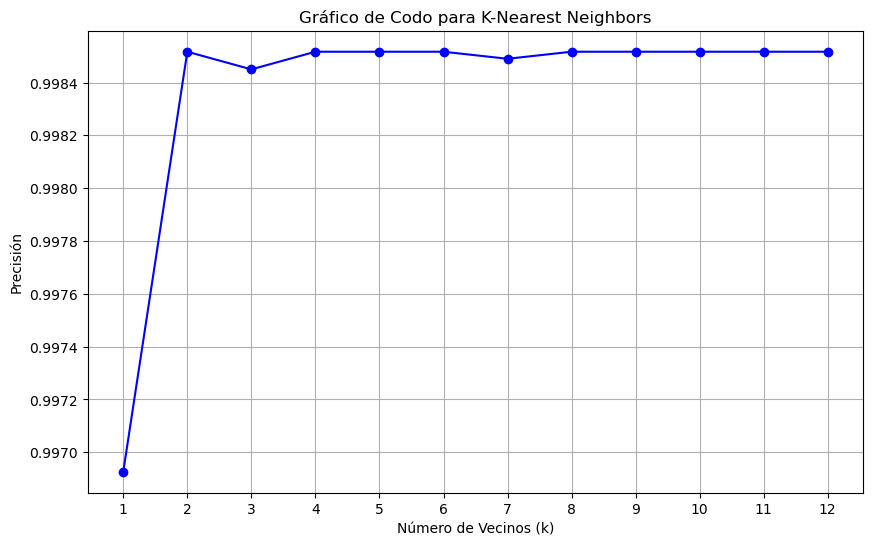

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Reemplaza esto con tu DataFrame y las columnas correspondientes
# df = tu_dataframe
X = df[["scoring"]]  # Reemplaza con las columnas de características
y = df["default"]     # Reemplaza con la columna de etiquetas

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Evaluar precisión para diferentes valores de k
k_values = range(1, 13)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Graficar el resultado
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title("Gráfico de Codo para K-Nearest Neighbors")
plt.xlabel("Número de Vecinos (k)")
plt.ylabel("Precisión")
plt.xticks(k_values)
plt.grid()
plt.show()





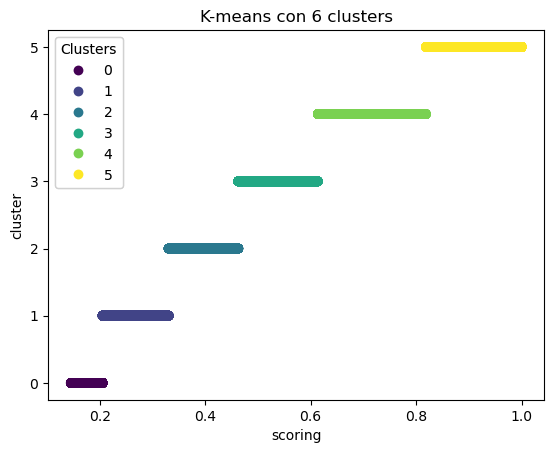

1    0.340043
2    0.288851
0    0.274266
3    0.050551
4    0.024989
5    0.021300
Name: cluster, dtype: float64

In [6]:
# Clustering con todas las variables
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df.drop('default', axis=1)
kmeans = KMeans(n_clusters=6, random_state=0).fit(df['scoring'].values.reshape(-1, 1))# df['scoring'].values.reshape(-1, 1)
df['cluster'] = kmeans.labels_

cluster_means = df.groupby('cluster')['scoring'].mean().sort_values() 

# Crear un diccionario para mapear los clusters originales a los nuevos clusters ordenados
cluster_order = {old: new for new, old in enumerate(cluster_means.index)} 

# Reasignar los clusters 
df['cluster'] = df['cluster'].map(cluster_order) 

# Visualización 
fig, ax = plt.subplots() 
scatter = ax.scatter(df['scoring'], df['cluster'], c=df['cluster']) 
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters") 
ax.xaxis.set_label_text('scoring')
ax.yaxis.set_label_text('cluster')
ax.add_artist(legend1) 
plt.title('K-means con 6 clusters')
plt.show() 

display(df['cluster'].value_counts(normalize=True))

,k,max_mean,min_mean,within_var,size_var
0,4,0.019893,0.000384,0.005374,1.215080e+09
1,5,0.026597,0.000376,0.006392,1.351140e+09
2,6,0.032562,0.000377,0.007525,1.384362e+09
3,7,0.032831,0.000365,0.006661,8.038529e+08
4,8,0.037718,0.000365,0.007150,7.811835e+08
5,9,0.038304,0.000288,0.006597,7.212056e+08
6,10,0.041918,0.000288,0.006998,6.958547e+08
7,11,0.043579,0.000288,0.006915,6.480644e+08
8,12,0.044669,0.000289,0.006485,5.627381e+08


c:\Users\ibene\.conda\envs\DM_reto9\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


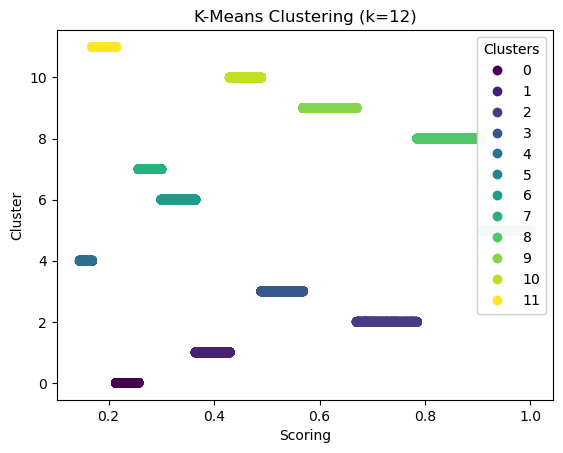

Métricas para k óptimo:
k             1.200000e+01
max_mean      4.466945e-02
min_mean      2.888253e-04
within_var    6.485418e-03
size_var      5.627381e+08
score        -5.627381e+08
Name: 8, dtype: float64


In [19]:
k_values = range(4, 13)  # Rango de valores de k
cluster_metrics = []
df_mejor_cluster = df.copy()
df_mejor_cluster = df_mejor_cluster.drop('cluster', axis=1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_mejor_cluster['scoring'].values.reshape(-1, 1))
    df_mejor_cluster['cluster'] = kmeans.labels_

    # Calcular la media de default por clúster
    cluster_means = df_mejor_cluster.groupby('cluster')['default'].mean()

    # Calcular dispersión dentro de clústeres
    within_cluster_var = df_mejor_cluster.groupby('cluster')['default'].var().mean()

    # Calcular el tamaño de cada cluster
    cluster_sizes = df_mejor_cluster['cluster'].value_counts()
    size_variance = cluster_sizes.var()

    # Guardar métricas
    cluster_metrics.append({
        'k': k,
        'max_mean': cluster_means.max(),
        'min_mean': cluster_means.min(),
        'within_var': within_cluster_var,
        'size_var': size_variance
    })

# Convertir las métricas en un DataFrame
metrics_df = pd.DataFrame(cluster_metrics)
display(metrics_df)

# Seleccionar el valor óptimo de k considerando varianza de tamaños
metrics_df['score'] = metrics_df['max_mean'] - metrics_df['min_mean'] - metrics_df['within_var'] - metrics_df['size_var']
optimal_k_row = metrics_df.loc[metrics_df['score'].idxmax()]
optimal_k = int(optimal_k_row['k'])

# Ajustar el modelo con k óptimo
kmeans = KMeans(n_clusters=optimal_k, random_state=0).fit(df_mejor_cluster['scoring'].values.reshape(-1, 1))
df_mejor_cluster['cluster'] = kmeans.labels_

# Visualización
fig, ax = plt.subplots()
scatter = ax.scatter(df_mejor_cluster['scoring'], df_mejor_cluster['cluster'], c=df_mejor_cluster['cluster'], cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.xlabel('Scoring')
plt.ylabel('Cluster')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.show()

# Mostrar las métricas de k óptimo
print("Métricas para k óptimo:")
print(optimal_k_row)


In [20]:
for col in df_mejor_cluster.columns:
    if col != 'cluster':
        print(f"Variable: {col}")
        display(df_mejor_cluster.groupby('cluster')[col].mean())

Variable: Dias_impago_descubierto_year


cluster
0      0.389242
1      0.417652
2     15.958321
3      6.230625
4      0.107580
5     44.763848
6      5.166943
7      0.648066
8     21.838581
9     11.305423
10     3.709055
11     3.735717
Name: Dias_impago_descubierto_year, dtype: float64

Variable: Dias_impago_hip_year


cluster
0      0.036329
1      0.103418
2      7.384002
3      2.124172
4      0.007556
5     37.886242
6      0.656676
7      0.092020
8     13.111473
9      4.115498
10     1.276166
11     0.229830
Name: Dias_impago_hip_year, dtype: float64

Variable: Indicador_recibos


cluster
0     1.000000
1     0.026147
2     0.172541
3     0.120138
4     1.000000
5     0.174211
6     0.597245
7     0.169367
8     0.151285
9     0.167007
10    0.104004
11    1.000000
Name: Indicador_recibos, dtype: float64

Variable: Indicador_tarjeta


cluster
0     0.050067
1     0.024236
2     0.096537
3     0.079372
4     1.000000
5     0.102442
6     0.489096
7     0.853046
8     0.095548
9     0.097572
10    0.070586
11    1.000000
Name: Indicador_tarjeta, dtype: float64

Variable: Mora_ult5A


cluster
0     0.002981
1     0.003505
2     0.102360
3     0.154134
4     0.000000
5     0.318344
6     0.045657
7     0.001126
8     0.137894
9     0.084638
10    0.006617
11    0.016718
Name: Mora_ult5A, dtype: float64

Variable: Recibos_denegados_dummy


cluster
0     0.004931
1     0.008116
2     0.216978
3     0.112215
4     0.000000
5     0.209946
6     0.085448
7     0.016925
8     0.224756
9     0.173587
10    0.099040
11    0.044919
Name: Recibos_denegados_dummy, dtype: float64

Variable: Edad


cluster
0     47.688904
1     48.795715
2     50.069022
3     48.917750
4     45.332317
5     49.724032
6     46.373496
7     44.852703
8     49.956790
9     49.158171
10    48.316455
11    45.624919
Name: Edad, dtype: float64

Variable: Sal_BurCto_Year


cluster
0       12.770875
1       29.598529
2      771.009831
3      426.631806
4        3.476022
5     4945.575747
6       69.019147
7       19.991606
8     1151.192360
9      862.279809
10     281.454047
11      34.908501
Name: Sal_BurCto_Year, dtype: float64

Variable: default


cluster
0     0.000359
1     0.000726
2     0.009500
3     0.003457
4     0.000385
5     0.044669
6     0.001020
7     0.000289
8     0.012667
9     0.003857
10    0.002426
11    0.000727
Name: default, dtype: float64

Variable: scoring


cluster
0     0.240203
1     0.402991
2     0.724841
3     0.522147
4     0.149993
5     0.971213
6     0.327004
7     0.273421
8     0.844485
9     0.615500
10    0.456102
11    0.187655
Name: scoring, dtype: float64

### **3. Calibración de la PD**

3.1 Calcular el DR de cada bucket

In [21]:
df['cluster'] = df['cluster'].apply(lambda x: 0 if x == 1 else 1 if x == 0 else x)

print(df['cluster'].value_counts())

0    84818
2    72049
1    68411
3    12609
4     6233
5     5313
Name: cluster, dtype: int64


In [22]:
# DR por cluster
print("DR por cluster:")
display(df.groupby('cluster')['default'].mean())

DR por cluster:


cluster
0    0.000377
1    0.000409
2    0.000791
3    0.003490
4    0.008664
5    0.032562
Name: default, dtype: float64

3.2 Ajustar las PD por bucket usando la fórmula de Bayes

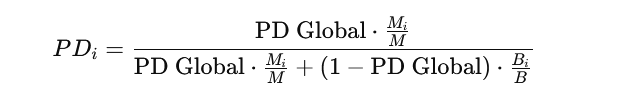

In [23]:
df_predicciones_macro

,FECHA,Paro,PIB,Precio_vivienda,Mora_Adq_Vivienda,Predicciones,Conf_int_lower,Conf_int_upper
0,2021-09-30,0.145786,105.201662,1657.860334,0.029578,0.003447,0.002784,0.004110
1,2021-12-31,0.139232,106.884889,1666.566146,0.028849,0.003446,0.002459,0.004433
2,2022-03-31,0.132973,107.953737,1675.262287,0.028419,0.003416,0.002167,0.004666
3,2022-06-30,0.126995,109.033275,1684.003804,0.028275,0.003384,0.001909,0.004859
4,2022-09-30,0.121286,109.905541,1692.790935,0.028413,0.003339,0.001664,0.005014
5,2022-12-31,0.118560,110.564974,1701.623917,0.028838,0.003281,0.001426,0.005136
6,2023-03-31,0.119746,111.007234,1713.684554,0.029562,0.003178,0.001158,0.005198
7,2023-06-30,0.120344,111.673278,1725.830673,0.030606,0.003081,0.000907,0.005254
8,2023-09-30,0.120645,112.566664,1738.062881,0.032005,0.002988,0.000671,0.005304
9,2023-12-31,0.120796,113.692330,1750.381787,0.033802,0.002899,0.000448,0.005350


In [24]:
for trimestre in df_predicciones_macro.index:
    for cluster in df['cluster'].unique():
        media_scoring = df.loc[df['cluster'] == cluster, 'scoring'].mean()
        pd_global = df_predicciones_macro.loc[trimestre, 'Predicciones']
        df_predicciones_macro.loc[trimestre, f'cluster_{cluster}'] = pd_global * media_scoring / (pd_global * media_scoring + (1 - pd_global) * (1 - media_scoring))

In [34]:
df_predicciones_macro['FECHA'] = pd.to_datetime(df_predicciones_macro['FECHA'])
df_predicciones_macro['FECHA']

0   2021-09-30
1   2021-12-31
2   2022-03-31
3   2022-06-30
4   2022-09-30
5   2022-12-31
6   2023-03-31
7   2023-06-30
8   2023-09-30
9   2023-12-31
Name: FECHA, dtype: datetime64[ns]

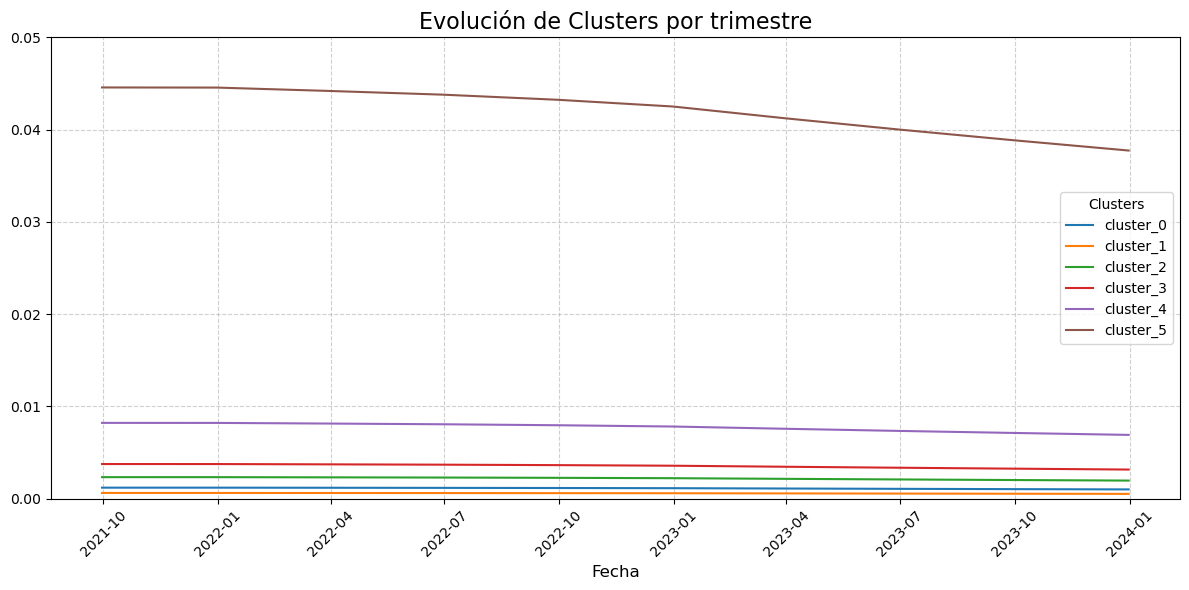

In [58]:

# Convertir la columna FECHA a formato datetime


# Configurar el gráfico
plt.figure(figsize=(12, 6))

# Graficar cada cluster
for cluster in ["cluster_0", "cluster_1", "cluster_2", "cluster_3", "cluster_4", "cluster_5"]:
    plt.plot(df_predicciones_macro["FECHA"], df_predicciones_macro[cluster], label=cluster)

# Personalizar el gráfico
plt.title("Evolución de Clusters por trimestre", fontsize=16)
plt.xlabel("Fecha", fontsize=12)
# plt.ylabel("Valor", fontsize=12)
plt.ylim(0, 0.05)  # Eje Y entre 0 y 1
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mayor legibilidad
plt.legend(title="Clusters")
plt.grid(True, linestyle="--", alpha=0.6)

# Mostrar el gráfico
plt.tight_layout()  # Ajustar diseño para evitar solapamientos
plt.show()

In [68]:
import plotly.express as px
# Reestructurar el DataFrame para usar Plotly Express
df_melted = df_predicciones_macro.melt(id_vars="FECHA", var_name="Cluster", value_name="Valor")

# Crear el gráfico interactivo
fig = px.line(
    df_melted,
    x="FECHA",
    y="Valor",
    color="Cluster",
    title="Evolución de Clusters",
    labels={"Valor": "Valor", "FECHA": "Fecha"},
    template="plotly_white",
)

# Ajustar el rango del eje Y
fig.update_yaxes(range=[0, 0.05])

# Mostrar el gráfico
fig.show()

In [26]:
for trimestre in df_predicciones_macro.index:
    pd_media_ponderada = 0
    for columna_cluster in df_predicciones_macro.columns[8:]:
        cantidad_del_cluster = df['cluster'].value_counts(normalize=True).loc[int(columna_cluster.split('_')[1])]
        print(cantidad_del_cluster, df_predicciones_macro.loc[trimestre, columna_cluster])
        pd_media_ponderada += df_predicciones_macro.loc[trimestre, columna_cluster] * cantidad_del_cluster
    
    print(f"Predicción de default para el trimestre {trimestre}: {df_predicciones_macro.loc[trimestre, 'Predicciones']}") # calculado con el modelo
    print(f"Predicción de default ponderada: {pd_media_ponderada}") # con la formula 


0.3400432180184659 0.0011990616746996798
0.2742660353682151 0.0006248095837852523
0.2888511143272943 0.002337379850968817
0.05055064887164088 0.0037579176894644104
0.02498867431334266 0.008218142246415785
0.02130030910104116 0.04456870931868168
Predicción de default para el trimestre 0: 0.0034467328815973
Predicción de default ponderada: 0.002598904554818267
0.3400432180184659 0.0011986523488056282
0.2742660353682151 0.0006245961687971997
0.2888511143272943 0.0023365828443629587
0.05055064887164088 0.003756638127619235
0.02498867431334266 0.008215356512631986
0.02130030910104116 0.04455415524025451
Predicción de default para el trimestre 1: 0.0034455589109628
Predicción de default ponderada: 0.002598032316750174
0.3400432180184659 0.0011883971827339832
0.2742660353682151 0.000619249341281575
0.2888511143272943 0.0023166146037213856
0.05055064887164088 0.0037245795199973234
0.02498867431334266 0.008145558953515644
0.02130030910104116 0.04418937950305095
Predicción de default para el tri

In [27]:
df['scoring'].mean()

0.3100841334942593